In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

../fr/ff-df/000_003.mp4
< cv2.VideoCapture 0x7f0991ce9130>
True


'while success:\n    count = count + 1\n    sec = sec + frameRate\n    sec = round(sec, 2)\n    success = getFrame(sec)\n'

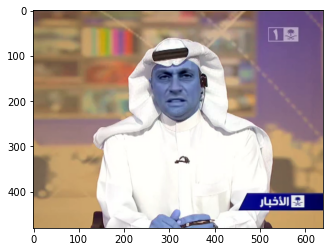

In [7]:
import cv2

VIDEO_STREAM = "../fr/ff-df/000_003.mp4"
#VIDEO_STREAM_OUT = "/kaggle/input/deepfake-detection-challenge/test_videos/Result.mp4"
print(VIDEO_STREAM)
vidcap = cv2.VideoCapture(VIDEO_STREAM)
print(vidcap)
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    print(hasFrames)
    if hasFrames:
        #cv2.imwrite("image"+str(count)+".jpg", image) # save frame as JPG file
        path = "../fr/ff-df/output/000_003"
        cv2.imwrite(os.path.join(path , "image"+str(count)+".jpg"), image)
        cv2.waitKey(0)
        plt.imshow(image)
           
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
'''while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
'''

(720, 1280, 3)


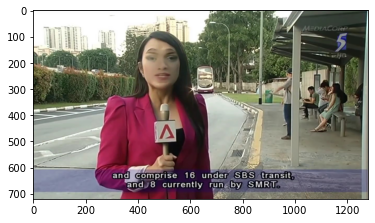

In [5]:
pic = plt.imread('../fr/ff-df/output/001_870/image1.jpg')
print(pic.shape)
plt.imshow(pic)

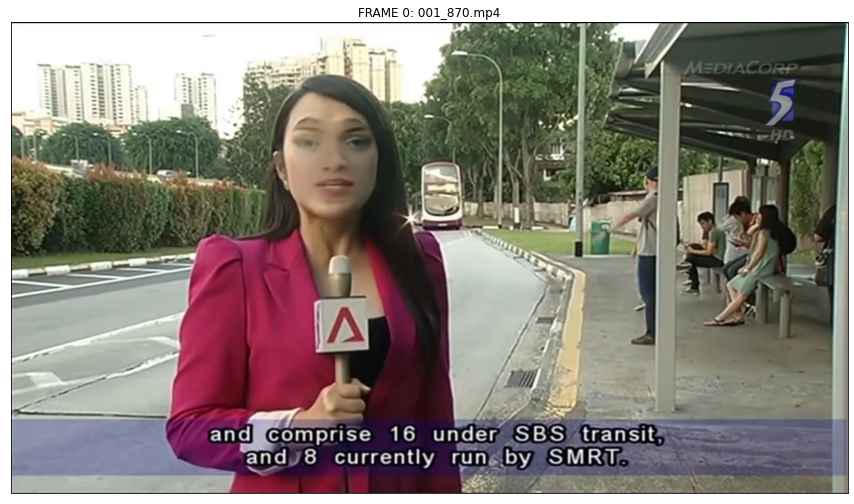

In [2]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = '../fr/ff-df/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = '../fr/ff-df/001_870.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 133, Left: 408, Bottom: 288, Right: 562
0


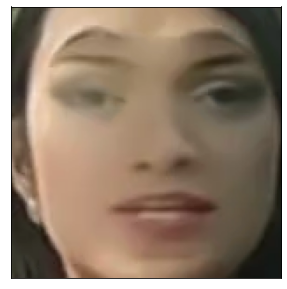

In [3]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)
    face_landmarks_list = face_recognition.face_landmarks(face_image)
    print(len(face_landmarks_list))
    #face_landmarks = face_landmarks_list[0]

In [4]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(416, 188), (417, 206), (421, 224), (423, 242), (427, 260), (438, 275), (453, 286), (471, 296), (492, 299), (512, 295), (530, 286), (544, 274), (553, 259), (558, 241), (560, 223), (562, 205), (562, 187)]
The left_eyebrow in this face has the following points: [(427, 165), (439, 158), (452, 158), (466, 161), (478, 166)]
The right_eyebrow in this face has the following points: [(507, 166), (519, 161), (531, 159), (544, 159), (554, 164)]
The nose_bridge in this face has the following points: [(494, 181), (495, 192), (496, 202), (497, 214)]
The nose_tip in this face has the following points: [(480, 226), (488, 227), (495, 229), (503, 227), (509, 225)]
The left_eye in this face has the following points: [(441, 186), (450, 182), (460, 182), (469, 187), (460, 189), (450, 189)]
The right_eye in this face has the following points: [(514, 187), (524, 182), (534, 182), (543, 185), (535, 189), (525, 189)]
The top_lip in this face has the following p

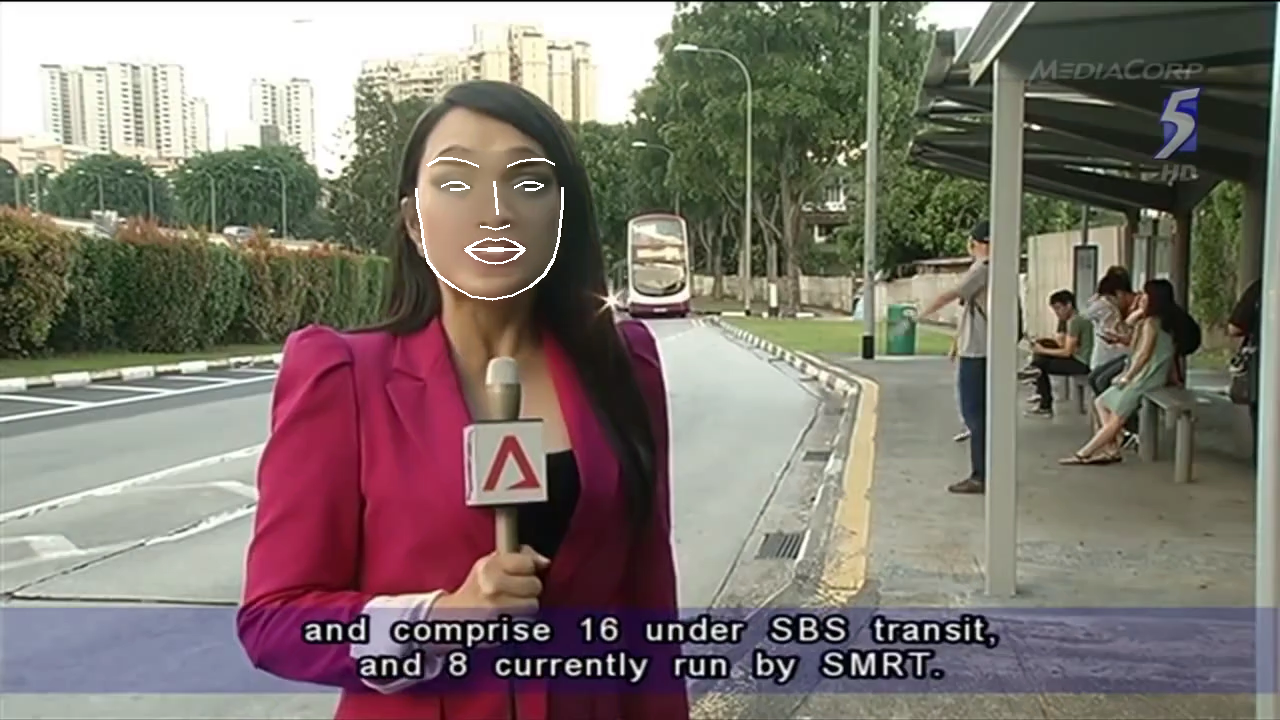

In [5]:
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)
face_landmarks_list = face_recognition.face_landmarks(image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

In [8]:
video_file = '../fr/ff-df/001_870.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  460


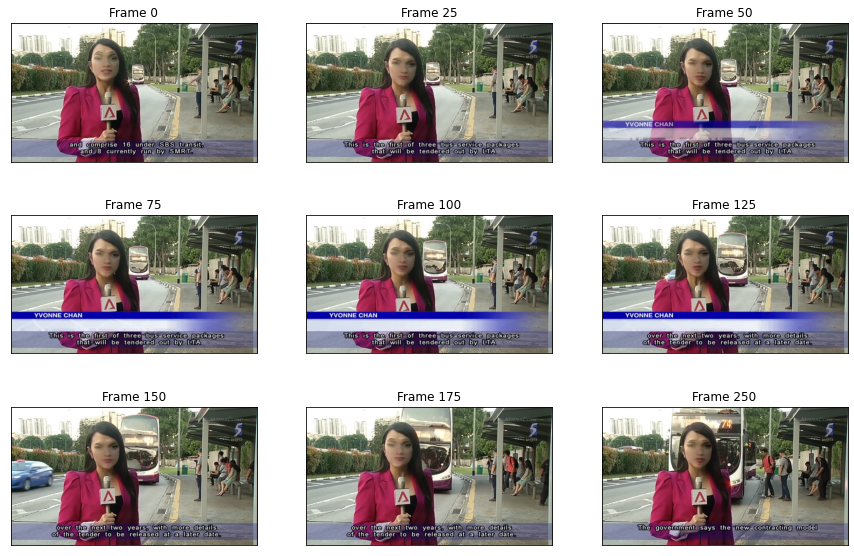

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

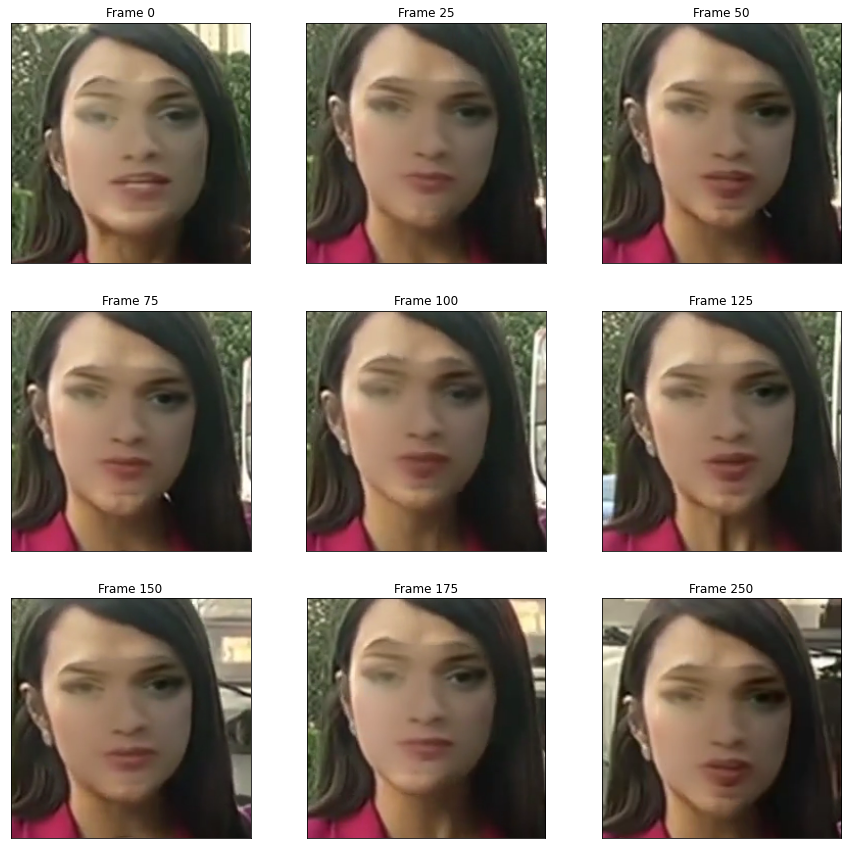

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

The number of frames saved:  460


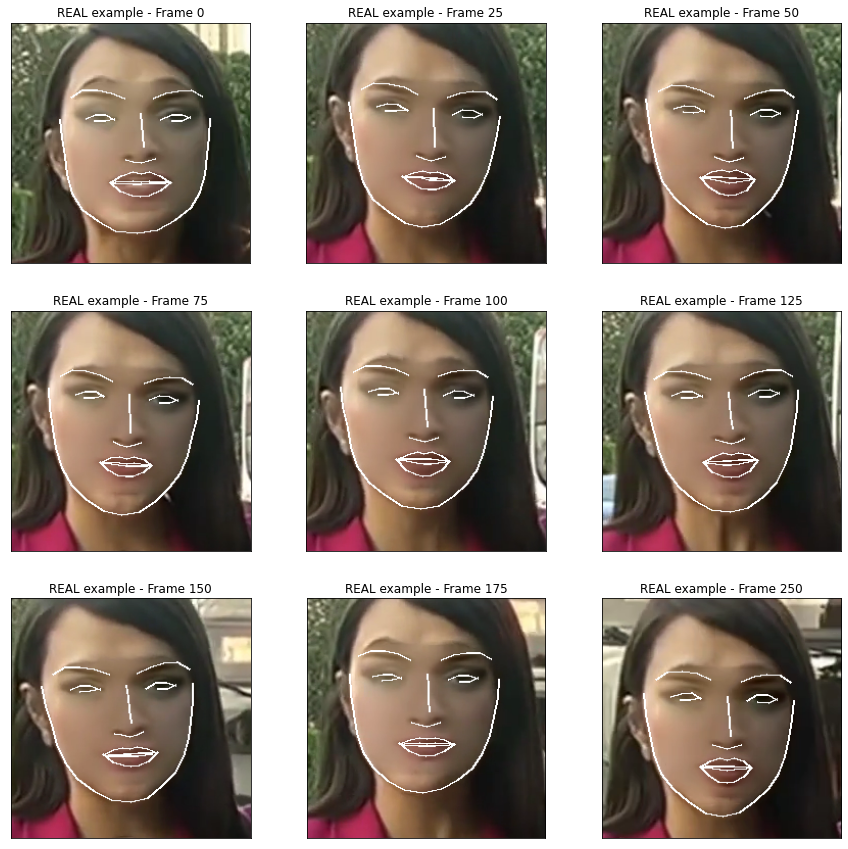

In [11]:
fn = '001_870.mp4'
video_file = f'../fr/ff-df/{fn}'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()